In [3]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('spotifyclassification/data.csv')

In [5]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
train, test = train_test_split(data, test_size = 0.15)

In [7]:
print("Training size: {}: Test size: {}".format(len(train), len(test)))

Training size: 1714: Test size: 303


In [8]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [17]:
#Comparation
pos_danceability = data[data['target'] == 1]['danceability']
neg_danceability = data[data['target'] == 0]['danceability']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_duration_ms = data[data['target'] == 1]['duration_ms']
neg_duration_ms = data[data['target'] == 0]['duration_ms']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_liveness = data[data['target'] == 1]['liveness']
neg_liveness = data[data['target'] == 0]['liveness']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

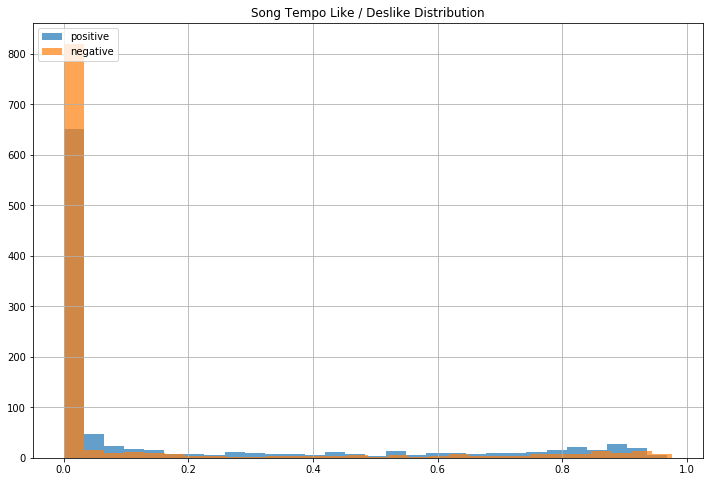

In [19]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

#Chart
fig = plt.figure(figsize=(12,8)) 
plt.title("Song Tempo Like / Deslike Distribution")
pos_instrumentalness.hist(alpha = 0.7, bins = 30, label='positive')
neg_instrumentalness.hist(alpha = 0.7, bins = 30, label='negative')
plt.legend(loc = 'upper left')

In [11]:
pos_tempo

0       150.062
1       160.083
2        75.044
3        86.468
4       174.004
5        85.023
6        80.030
7       144.154
8       130.035
9        99.994
10      111.951
11      104.322
12      127.681
13      130.007
14      125.011
15       99.988
16      123.922
17      122.415
18      140.061
19      109.982
20      128.049
21      130.031
22      139.922
23      138.022
24       94.498
25      109.977
26      110.016
27      100.040
28      120.021
29      129.004
         ...   
990      96.990
991      96.006
992     174.062
993     130.032
994     125.993
995     129.948
996     142.584
997     142.911
998     113.074
999     174.589
1000    149.948
1001    139.639
1002    140.157
1003    139.096
1004    136.213
1005    129.989
1006    137.644
1007    137.905
1008    139.608
1009    139.725
1010    139.871
1011    139.870
1012    125.462
1013    144.256
1014     83.204
1015    139.997
1016     86.733
1017    140.008
1018    147.072
1019    107.039
Name: tempo, Length: 102

In [12]:
neg_tempo

1020    143.919
1021     92.003
1022     88.541
1023     88.965
1024    104.986
1025    149.962
1026     84.009
1027     83.948
1028    120.037
1029     82.022
1030    176.127
1031     73.033
1032    113.054
1033    115.000
1034     90.005
1035    151.928
1036    141.967
1037    152.117
1038    156.107
1039     83.886
1040    160.023
1041     80.996
1042    103.009
1043     92.097
1044     74.923
1045    145.861
1046    168.032
1047    159.907
1048    171.945
1049    155.855
         ...   
1987    134.027
1988    162.435
1989     96.000
1990    138.021
1991    148.121
1992    169.889
1993    145.107
1994     99.964
1995     99.889
1996    103.963
1997    160.064
1998    140.048
1999    149.935
2000    170.032
2001    131.049
2002    149.843
2003    159.927
2004    150.001
2005    150.181
2006    154.901
2007    144.986
2008     97.957
2009    149.964
2010    102.003
2011    128.268
2012     74.976
2013    110.041
2014    150.082
2015    150.011
2016    190.013
Name: tempo, Length: 997